In [16]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pooldata=pd.read_csv('pool_data_202211111622-04_500-20221101.csv', sep=',')

In [4]:
pooldata

,pool_id,time_stamp,t_s Right,salinity,flow switch,flow meter,turbidity,ORP,PH,TDS,...,Shw msg,Drain,Human Counter,temperature,water level,cppm,phfeedtime,orpfeedtime,bather in from mens,bather in from ladies
0,10001,2022-11-01 11:01:16,-400,287.175,NaN,NaN,9.51440,774.049,7.41573,287.175,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
1,10001,2022-11-01 11:01:26,-400,287.175,NaN,NaN,9.35767,773.597,7.41573,287.175,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
2,10001,2022-11-01 11:01:36,-400,287.121,NaN,NaN,9.35767,773.869,7.41889,287.121,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
3,10001,2022-11-01 11:01:46,-400,287.248,NaN,NaN,8.57397,773.959,7.41193,287.248,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
4,10001,2022-11-01 11:01:57,-400,287.175,NaN,NaN,8.88745,773.597,7.41699,287.157,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39663,10001,2022-11-07 21:59:25,-500,286.054,NaN,NaN,31.27080,719.615,7.60182,286.054,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
39664,10001,2022-11-07 21:59:35,-500,286.018,NaN,NaN,31.11380,719.434,7.58536,286.018,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
39665,10001,2022-11-07 22:59:44,-500,285.294,NaN,NaN,31.27080,717.083,7.58916,285.294,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
39666,10001,2022-11-07 22:59:54,-500,285.258,NaN,NaN,30.95700,717.355,7.59422,285.258,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN


In [3]:
pooldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39668 entries, 0 to 39667
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pool_id                39668 non-null  int64  
 1   time_stamp             39668 non-null  object 
 2   t_s Right              39668 non-null  int64  
 3   salinity               39637 non-null  float64
 4   flow switch            31 non-null     float64
 5   flow meter             0 non-null      float64
 6   turbidity              39637 non-null  float64
 7   ORP                    39668 non-null  float64
 8   PH                     39668 non-null  float64
 9   TDS                    39637 non-null  float64
 10  Pressure in tank       0 non-null      float64
 11  Pressure in            39637 non-null  float64
 12  Pressure out           39637 non-null  float64
 13  Pump RPM               0 non-null      float64
 14  pump current           39637 non-null  float64
 15  di

In [12]:
# Always check for null values - they'll mess up your models
np.sum(pooldata.isnull())

pool_id                      0
time_stamp                   0
t_s Right                    0
salinity                    31
flow switch              39637
flow meter               39668
turbidity                   31
ORP                          0
PH                           0
TDS                         31
Pressure in tank         39668
Pressure in                 31
Pressure out                31
Pump RPM                 39668
pump current                31
dis_feeder               39668
ph_feeder                39668
Fresh water                 31
Shw msg                  39668
Drain                       31
Human Counter               31
temperature                  0
water level                 31
cppm                     39637
phfeedtime               39668
orpfeedtime              39668
bather in from mens      39668
bather in from ladies    39668
dtype: int64

In [13]:
# Convenient built in pandas method
corr_matrix = pooldata.corr()
corr_matrix['PH'].sort_values(ascending=False)

PH                       1.000000
ORP                      0.699825
temperature              0.168743
Pressure out             0.095507
pump current             0.088943
water level              0.047467
t_s Right               -0.031847
turbidity               -0.081530
Pressure in             -0.082515
TDS                     -0.177243
salinity                -0.177266
Human Counter           -0.473675
pool_id                       NaN
flow switch                   NaN
flow meter                    NaN
Pressure in tank              NaN
Pump RPM                      NaN
dis_feeder                    NaN
ph_feeder                     NaN
Fresh water                   NaN
Shw msg                       NaN
Drain                         NaN
cppm                          NaN
phfeedtime                    NaN
orpfeedtime                   NaN
bather in from mens           NaN
bather in from ladies         NaN
Name: PH, dtype: float64

<AxesSubplot:>

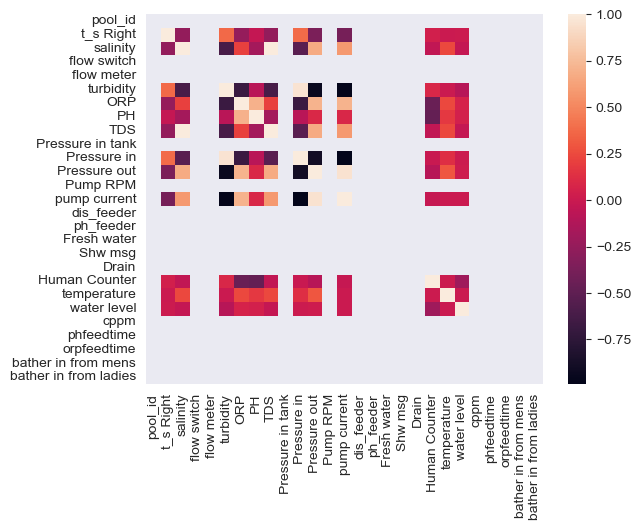

In [17]:
# Plot the map, useful for a high level glance at correlations
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)

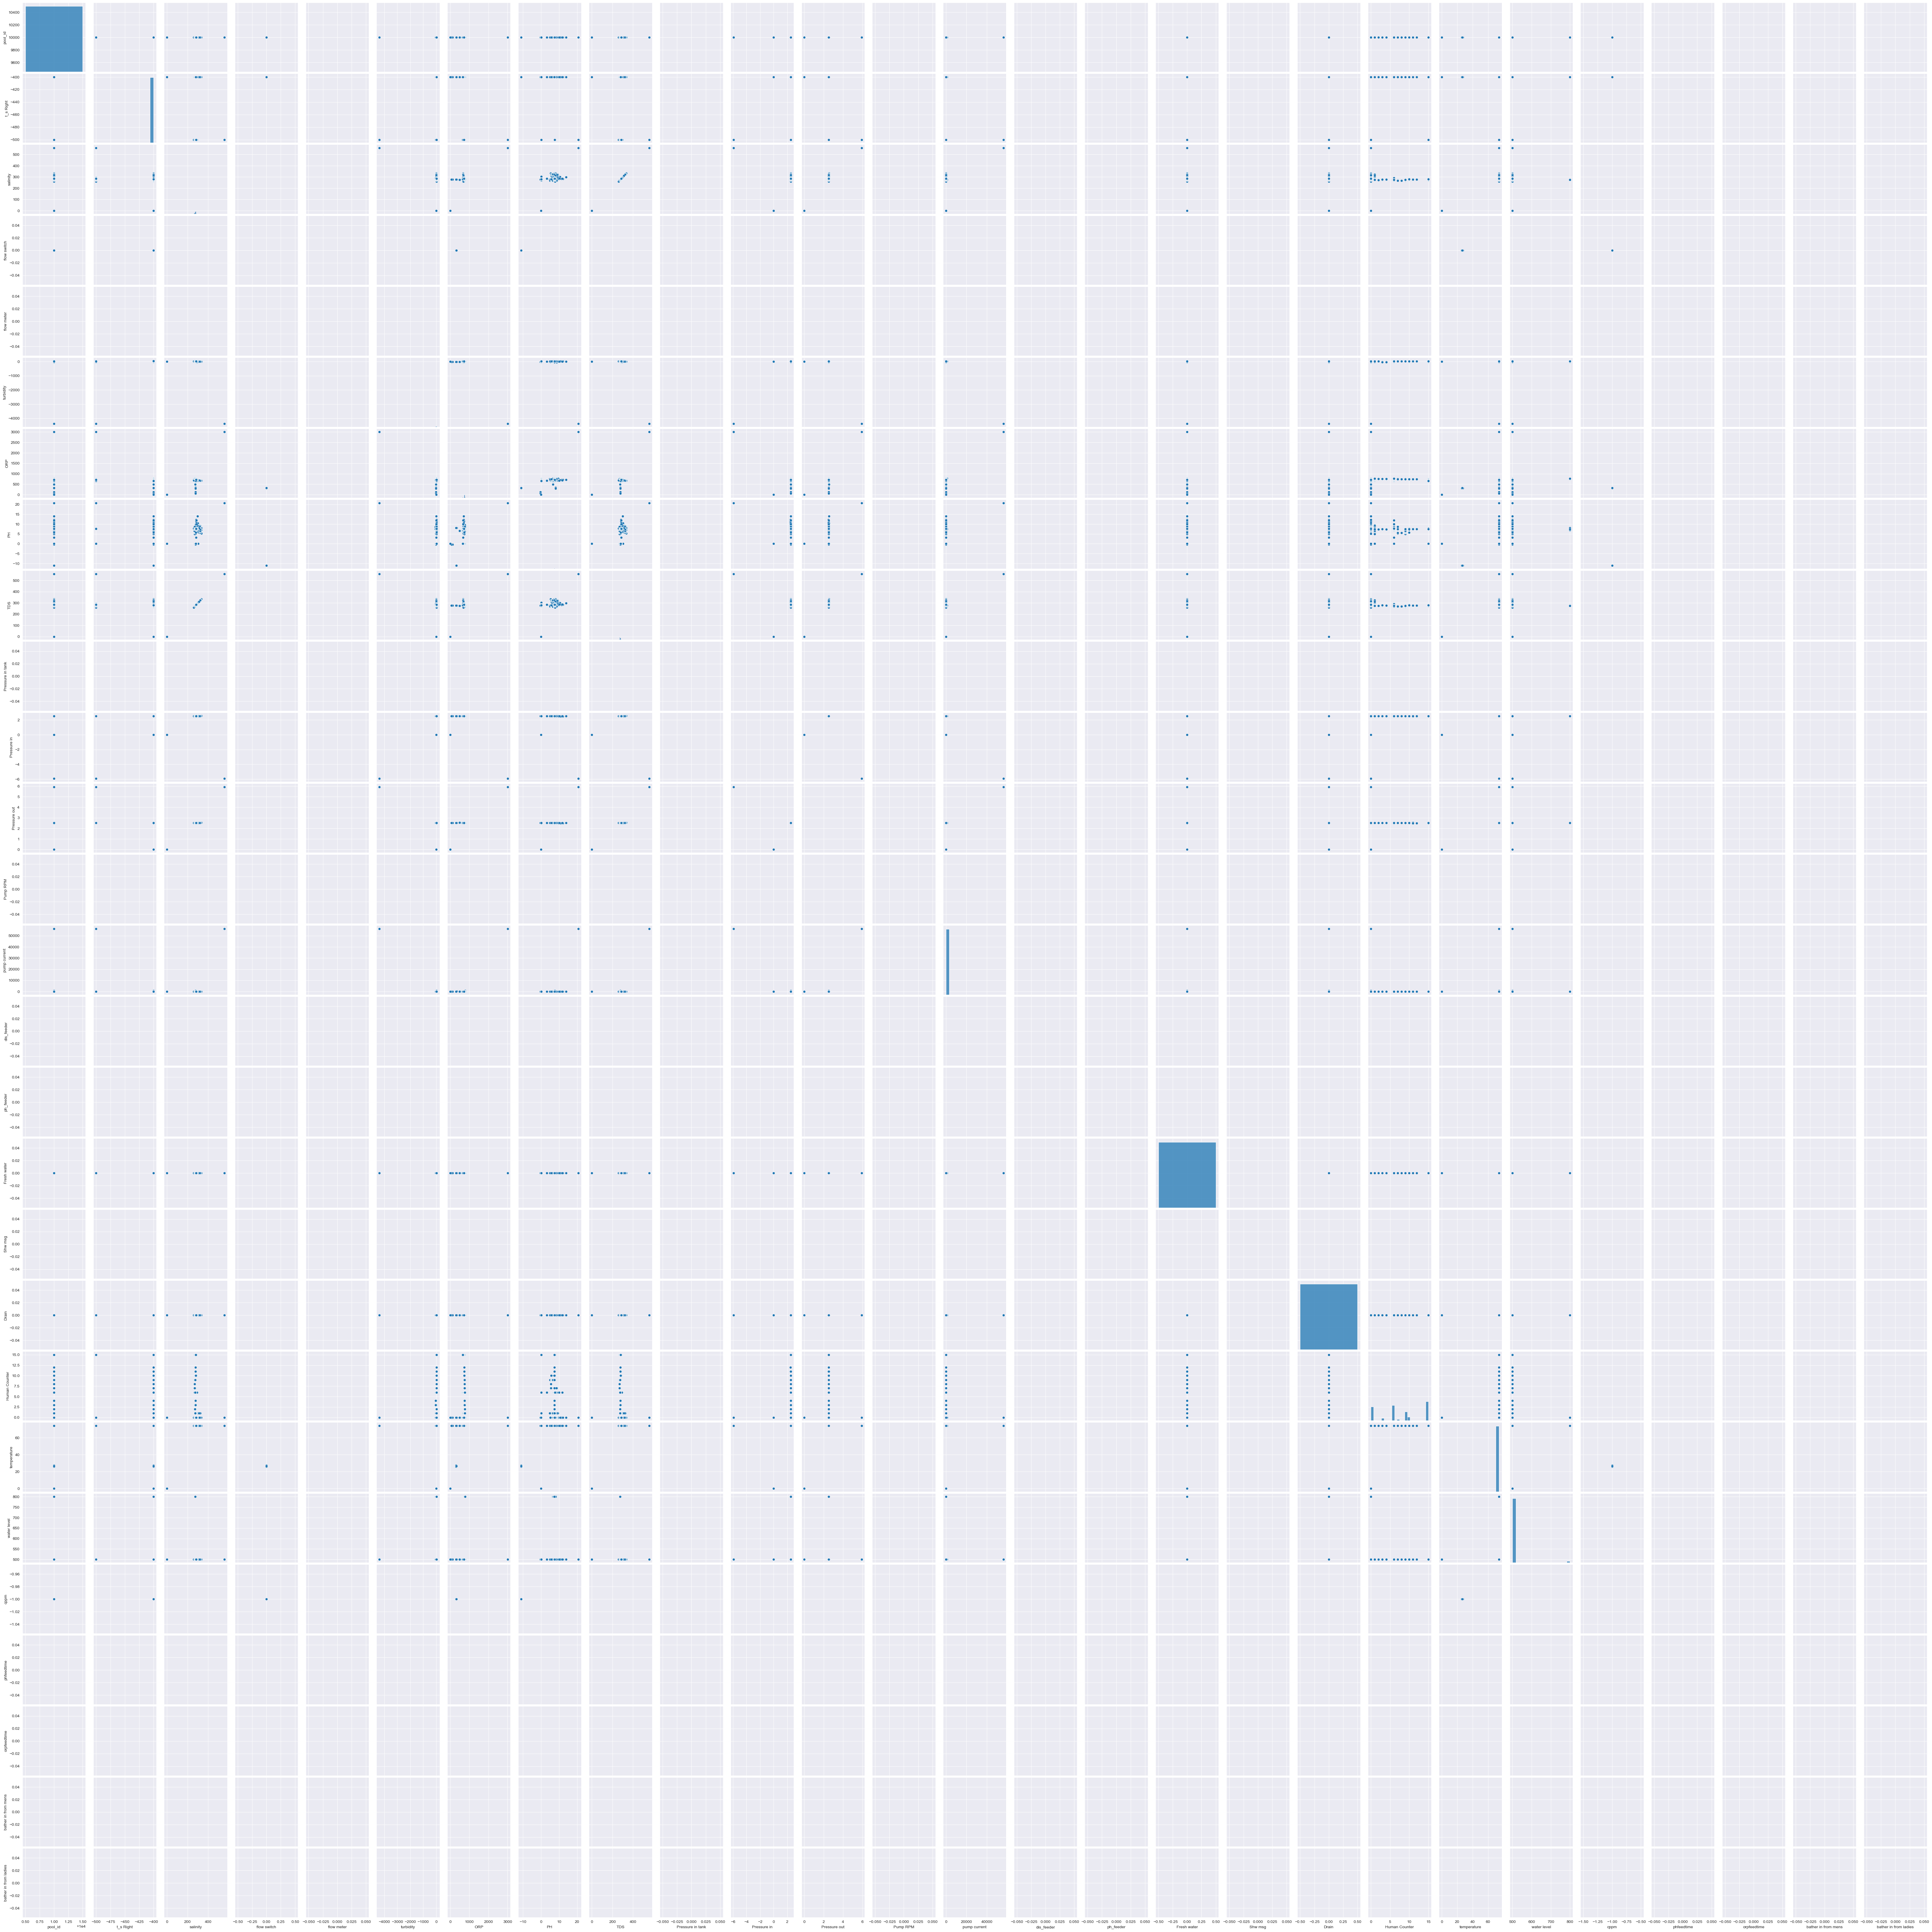

In [18]:
# More in depth look at how variables are plotted together.
sns.pairplot(pooldata)

In [ ]:
# Store the upper & lower bounds based on column name - useful later
upper_bounds = {}
lower_bounds = {}

# Best practice here
pooldata_copy = pooldata.copy()

for c in pooldata_copy.columns:
    # Get the quartiles to base the ranges on
    q25, q75 = np.percentile(train_copy[c], [25, 75])
    intr_qr = q75 - q25

    # Set some bounds - could vary
    upper = q75 + 1.5 * intr_qr
    lower = q25 - 1.5 * intr_qr

    # Store bounds
    upper_bounds[c] = upper
    lower_bounds[c] = lower

    # Logical AND to eliminate all rows whose value is not within bounds for the column we care about
    df = train[(train[c] >= lower) & (train[c] <= upper)].reset_index(drop=True)

<AxesSubplot:>

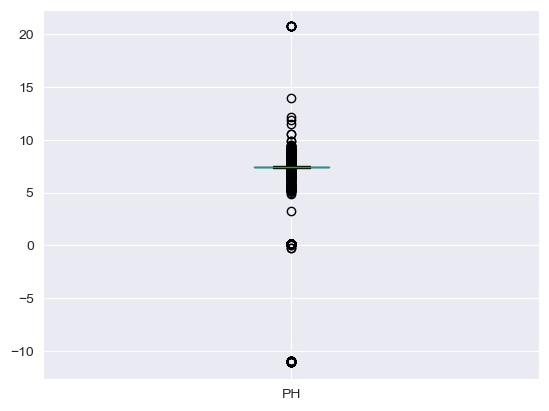

In [19]:
pooldata[['PH']].boxplot()

<AxesSubplot:>

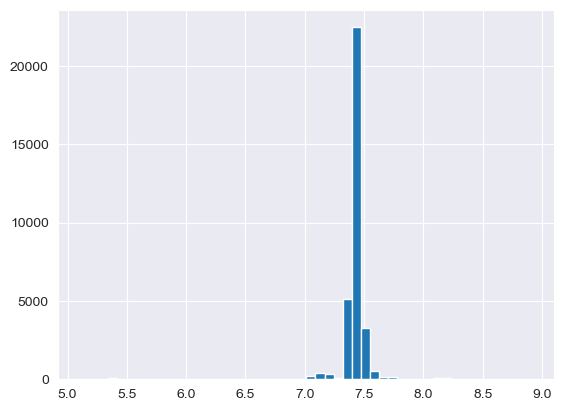

In [20]:
pooldata.loc[(pooldata['PH']<9) & (pooldata['PH']>5),'PH'].hist( bins=50)

In [21]:
pooldata.loc[(pooldata['PH']<9) & (pooldata['PH']>5),'PH'].describe()

count    33180.000000
mean         7.418791
std          0.183121
min          5.113690
25%          7.399270
50%          7.423320
75%          7.456870
max          8.914570
Name: PH, dtype: float64

In [22]:
pooldata['time_stamp']=pd.to_datetime(pooldata['time_stamp'],format='%Y-%m-%d %H:%M:%S')

In [23]:
colume=['salinity','turbidity','ORP','PH','TDS','Pressure in','Pressure in','Pressure out','pump current','Human Counter','temperature','water level']

In [24]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = 'time_stamp', y = col, data=pooldata, alpha=0.5)
        ax.set(xlabel='time_stamp', ylabel=col)
        ax.tick_params(axis='x', labelrotation=45)
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

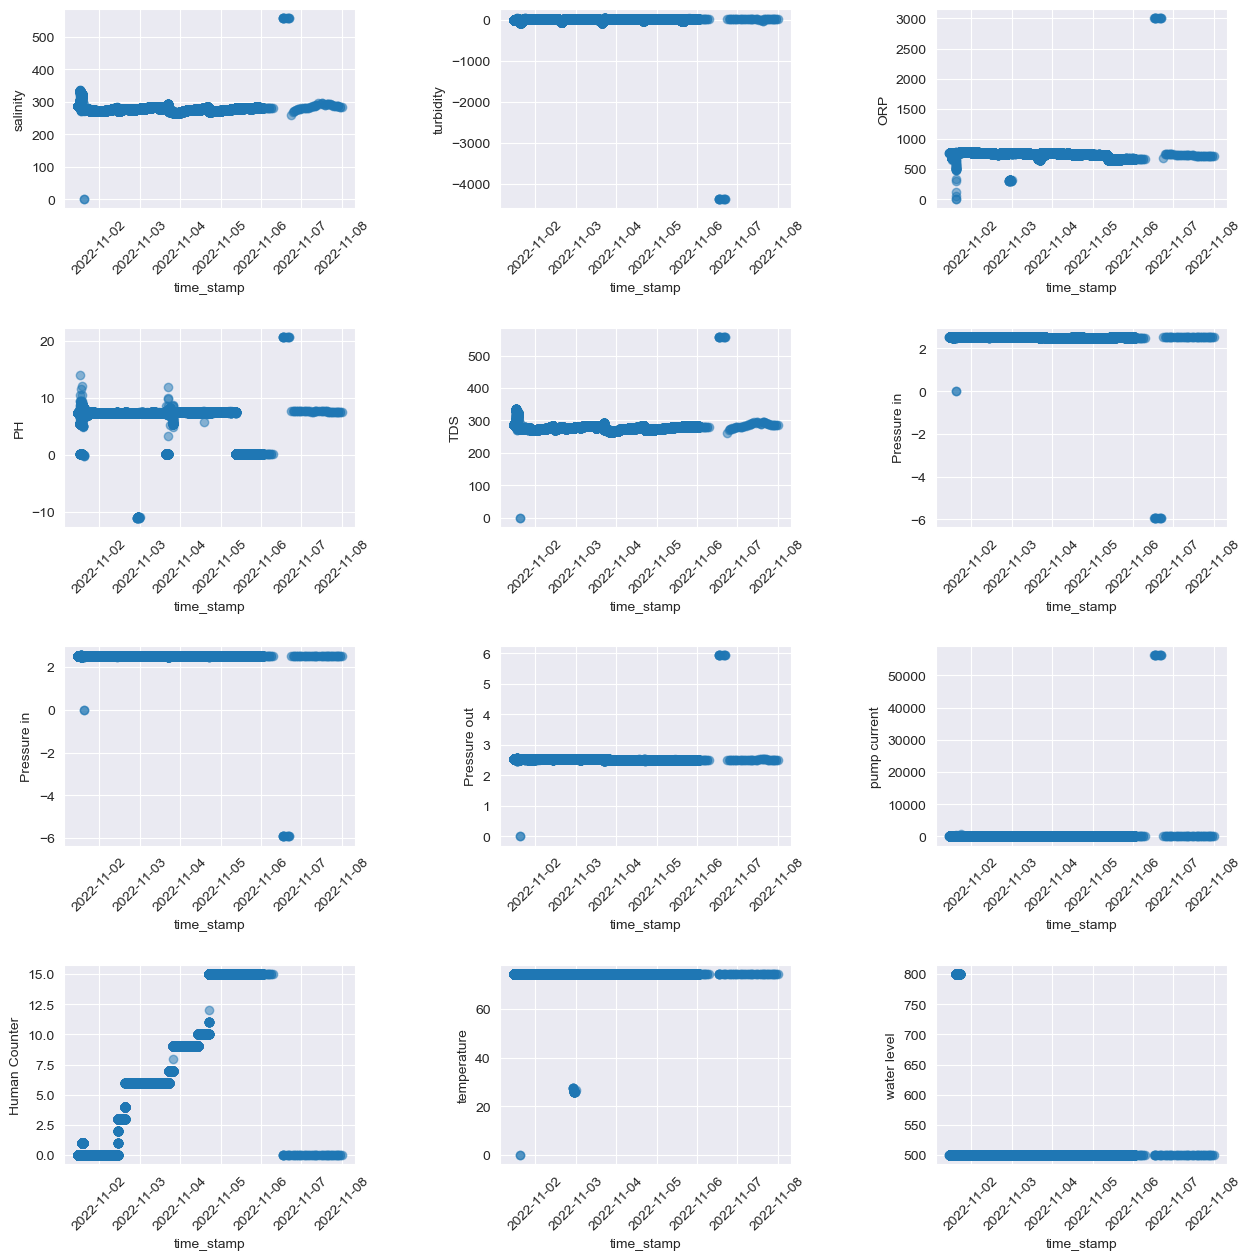

In [25]:
scatterplots(colume, ncol=3, figsize=(15, 15))

In [12]:
import pandas_profiling

In [13]:
pools_report=pandas_profiling.ProfileReport(pooldata)

In [14]:
pools_report.to_file('pools_report-clean.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]